<a href="https://colab.research.google.com/github/Qbaxxx/Metody_analizy_danych_LAB_JBabinski/blob/main/Lab_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install ucimlrepo

Braki danych:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64
Rozmiar przed czyszczeniem: (303, 14)
Rozmiar po czyszczeniu: (297, 14)


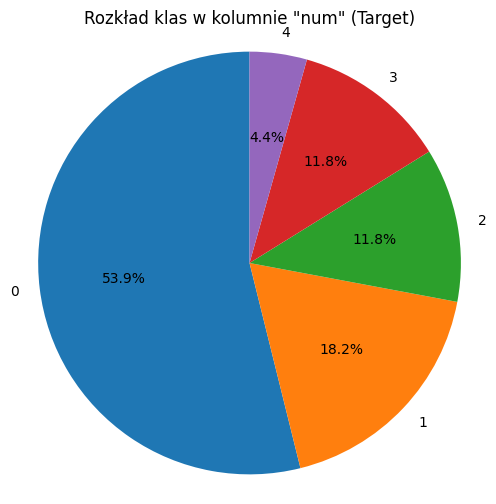

Rozkład wartości zmiennej 'num':
 num
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64

Statystyki opisowe:
           count        mean    std_dev    min     Q1     Q2     Q3    max  \
age       297.0   54.542088   9.049736   29.0   48.0   56.0   61.0   77.0   
trestbps  297.0  131.693603  17.762806   94.0  120.0  130.0  140.0  200.0   
chol      297.0  247.350168  51.997583  126.0  211.0  243.0  276.0  564.0   
thalach   297.0  149.599327  22.941562   71.0  133.0  153.0  166.0  202.0   
oldpeak   297.0    1.055556   1.166123    0.0    0.0    0.8    1.6    6.2   
num       297.0    0.946128   1.234551    0.0    0.0    0.0    2.0    4.0   

          median  
age         56.0  
trestbps   130.0  
chol       243.0  
thalach    153.0  
oldpeak      0.8  
num          0.0  

Moda dla cech kategorialnych:
 sex        1.0
cp         4.0
fbs        0.0
restecg    0.0
exang      0.0
slope      1.0
ca         0.0
thal       3.0
Name: 0, dtype: float64


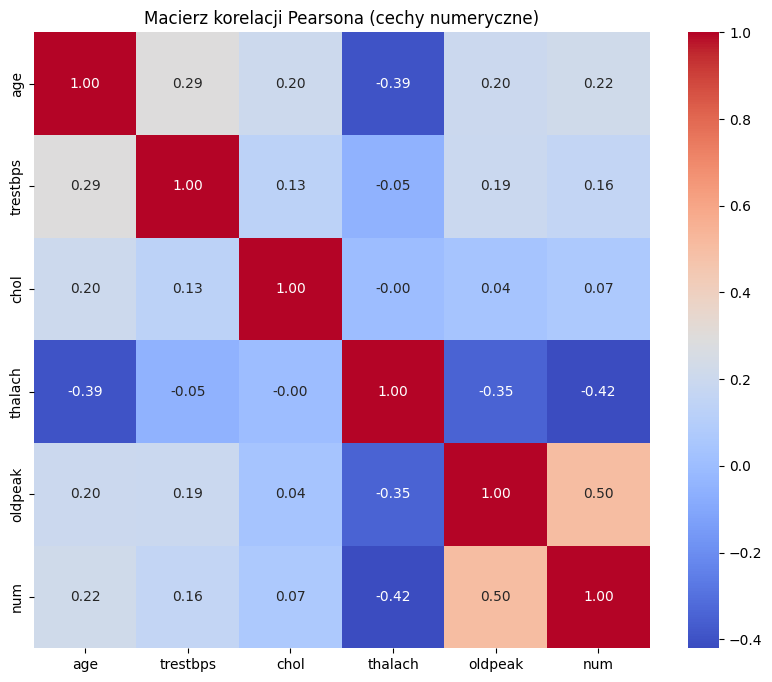


Macierz korelacji:
                age  trestbps      chol   thalach   oldpeak       num
age       1.000000  0.290476  0.202644 -0.394563  0.197123  0.222156
trestbps  0.290476  1.000000  0.131536 -0.049108  0.191243  0.159620
chol      0.202644  0.131536  1.000000 -0.000075  0.038596  0.066448
thalach  -0.394563 -0.049108 -0.000075  1.000000 -0.347640 -0.420639
oldpeak   0.197123  0.191243  0.038596 -0.347640  1.000000  0.501461
num       0.222156  0.159620  0.066448 -0.420639  0.501461  1.000000


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, ttest_ind, chi2_contingency
from ucimlrepo import fetch_ucirepo

# === 1. POBRANIE DANYCH ===
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets

# === 2. POŁĄCZENIE DANYCH I WSTĘPNE PRZETWARZANIE ===
cleveland_df = pd.concat([X, y], axis=1)

# Kolumny kategorialne wg dokumentacji
categorical_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
for col in categorical_cols:
    cleveland_df[col] = cleveland_df[col].astype("category")

# Sprawdzenie braków danych
missing_data = cleveland_df.isnull().sum()

# Usunięcie wierszy z brakami
cleveland_clean = cleveland_df.dropna().copy()

# Rozmiary przed i po
original_shape = cleveland_df.shape
clean_shape = cleveland_clean.shape

print("Braki danych:\n", missing_data)
print("Rozmiar przed czyszczeniem:", original_shape)
print("Rozmiar po czyszczeniu:", clean_shape)

# === 3. ANALIZA ZMIENNEJ CELU 'num' ===
target_counts = cleveland_clean['num'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Rozkład klas w kolumnie "num" (Target)')
plt.axis('equal')
plt.show()

print("Rozkład wartości zmiennej 'num':\n", target_counts)

# === 4. STATYSTYKI OPISOWE DLA ZMIENNYCH NUMERYCZNYCH ===
numeric_cols = cleveland_clean.select_dtypes(include=['float64', 'int64']).columns

desc_stats = cleveland_clean[numeric_cols].describe().T
desc_stats["median"] = cleveland_clean[numeric_cols].median()
desc_stats = desc_stats.rename(columns={"std": "std_dev", "25%": "Q1", "50%": "Q2", "75%": "Q3"})

print("\nStatystyki opisowe:\n", desc_stats)

# === 5. DOMINANTA DLA ZMIENNYCH KATEGORIALNYCH ===
mode_categorical = cleveland_clean[categorical_cols].mode().iloc[0]
print("\nModa dla cech kategorialnych:\n", mode_categorical)

# === 6. MACIERZ KORELACJI ===
correlation_matrix = cleveland_clean[numeric_cols].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Macierz korelacji Pearsona (cechy numeryczne)")
plt.show()

print("\nMacierz korelacji:\n", correlation_matrix)
